# I. Mushroom data machine learning
## 202STG01 고유정

# 1. 데이터 불러오기 & 전처리

In [249]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import random
import pickle as pkl
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

import time
import warnings


In [250]:
df = pd.read_csv("C:/Users/yjk9/Desktop/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [251]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [252]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [253]:
df.shape

(8124, 23)

In [254]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [255]:
features = df.columns

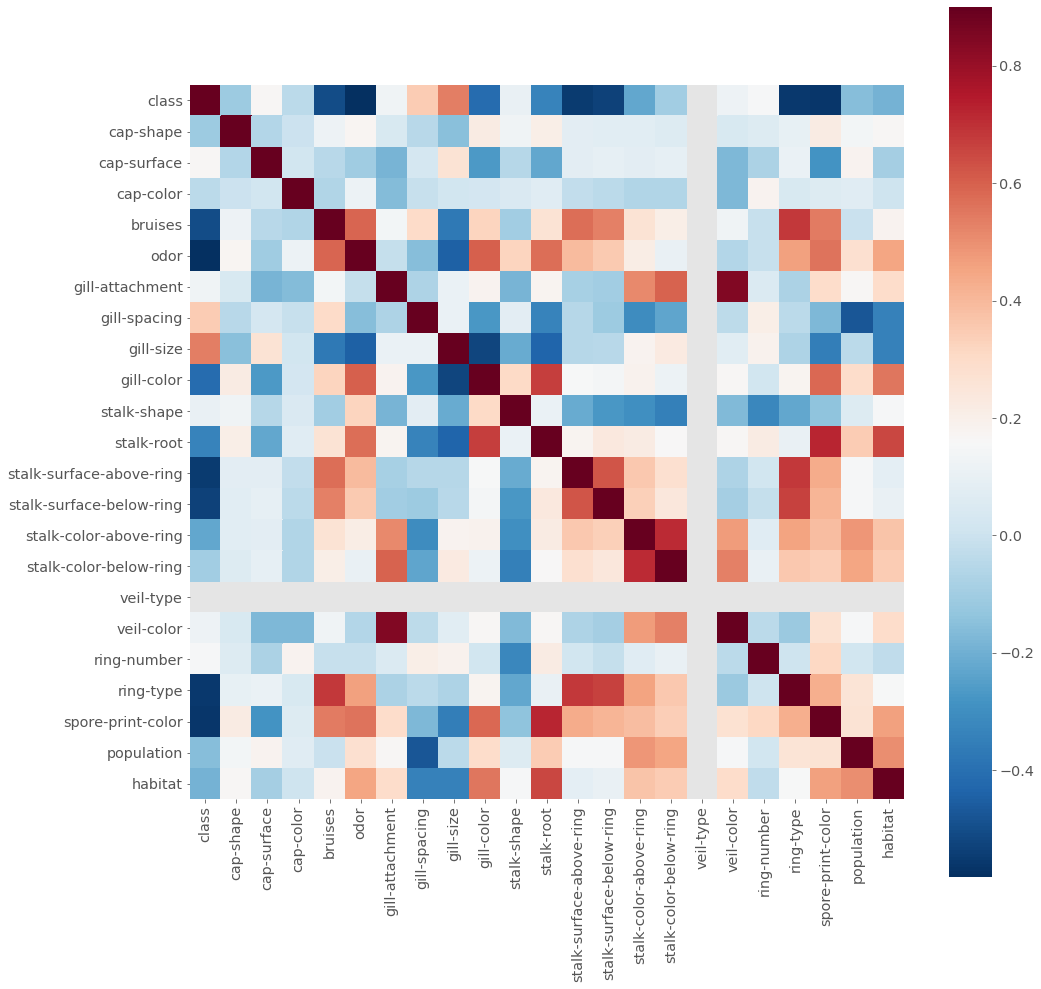

In [166]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap = "RdBu_r", vmax=0.9, square=True)

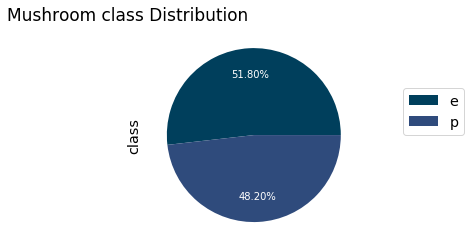

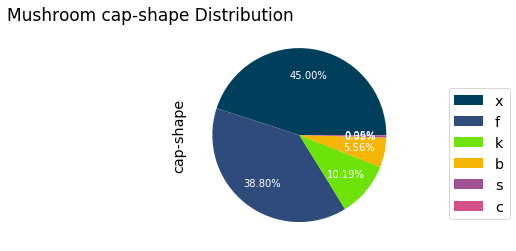

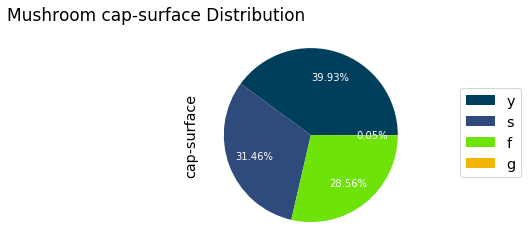

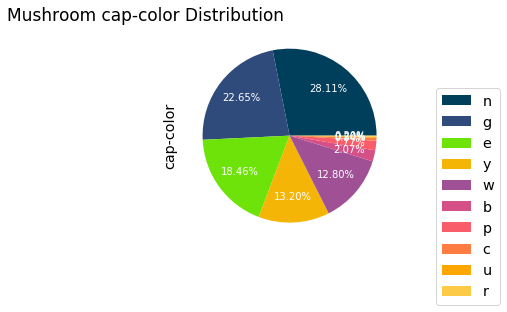

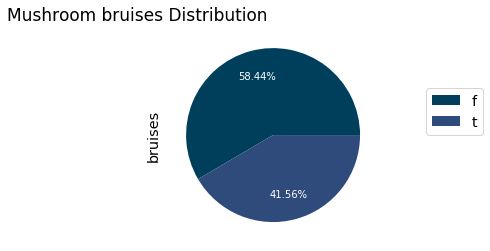

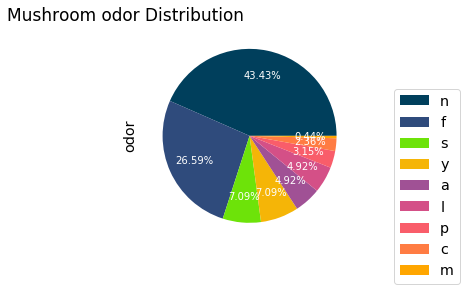

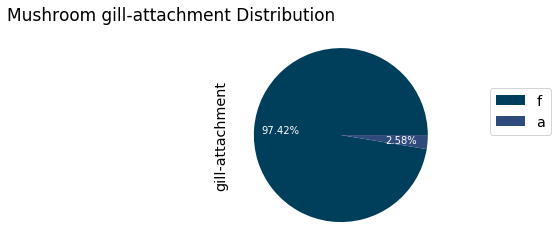

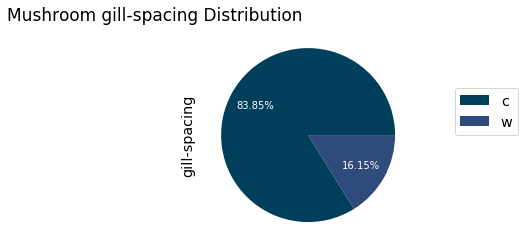

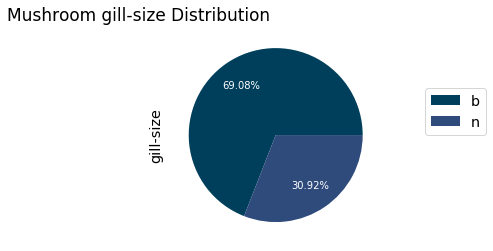

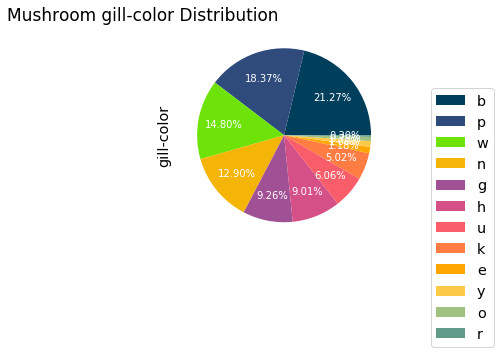

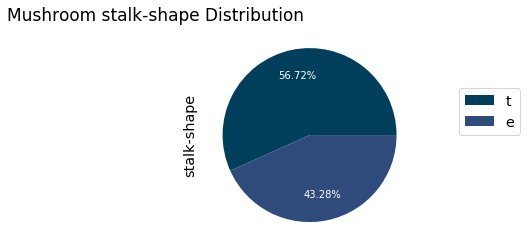

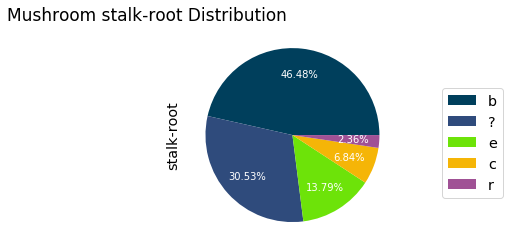

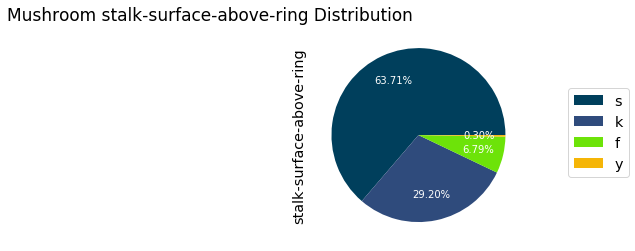

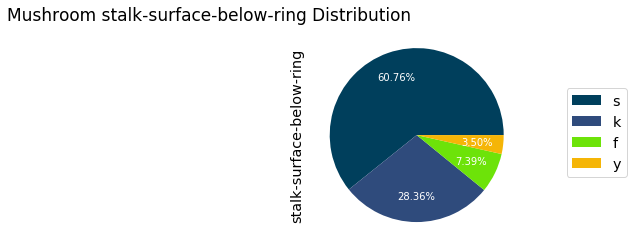

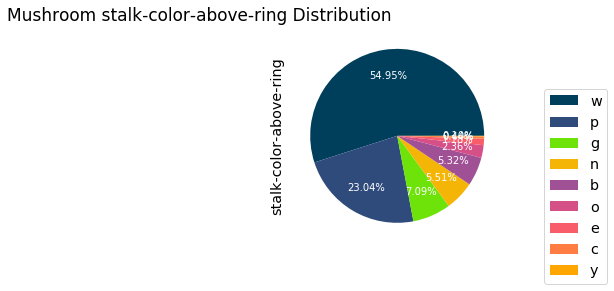

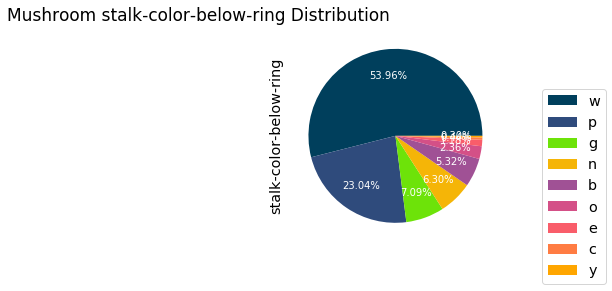

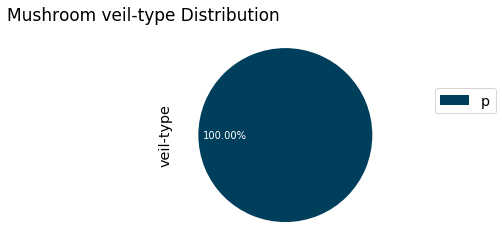

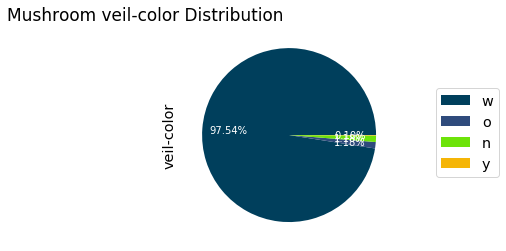

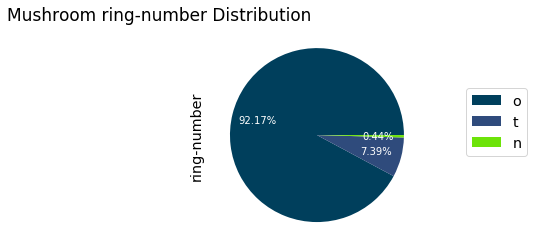

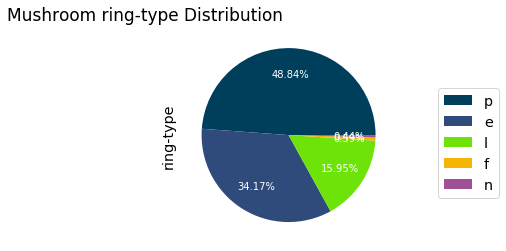

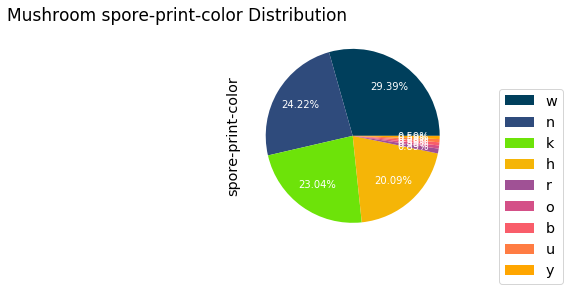

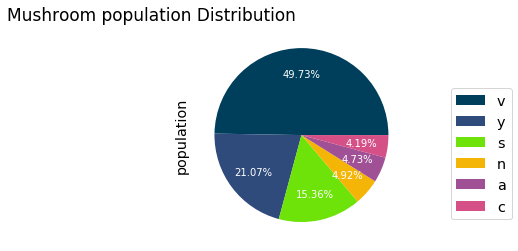

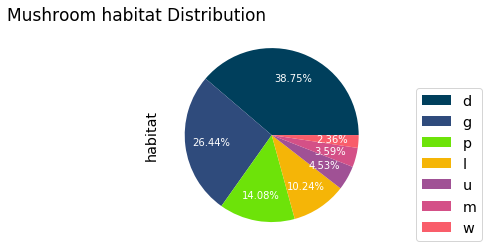

In [111]:
colors= ['#003f5c','#2f4b7c','#6de309','#f5b507','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#fcca46','#a1c181','#619b8a','#15e8aa']
for i in df.columns:
    plt.figure()
    df[i].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%',colors=colors, figsize=(5,5),labels=None,subplots=True)
    plt.title("Mushroom {} Distribution ".format(i),fontsize=17,ha='right')
    plt.legend(labels=df[i].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()

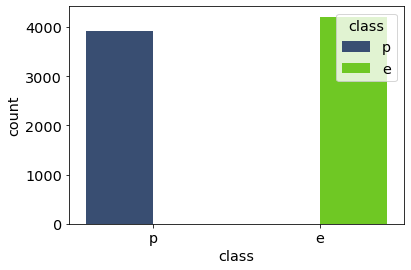

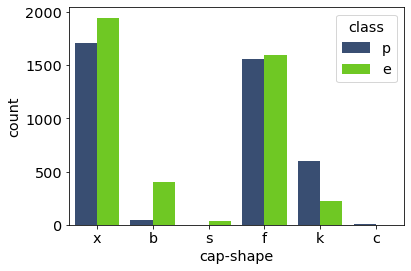

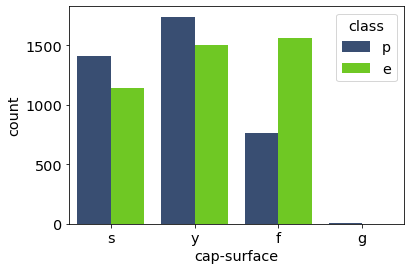

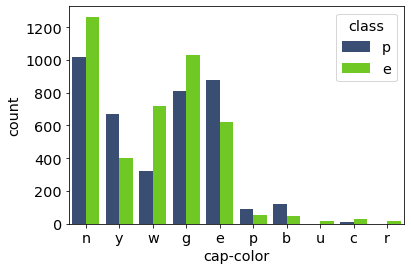

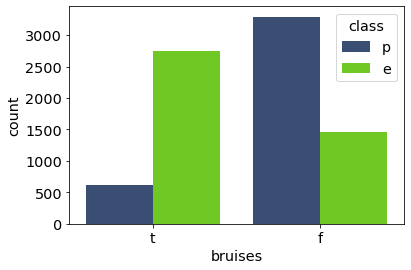

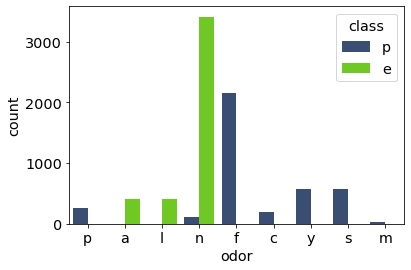

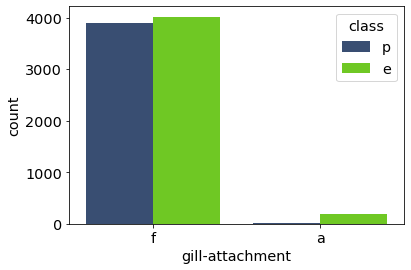

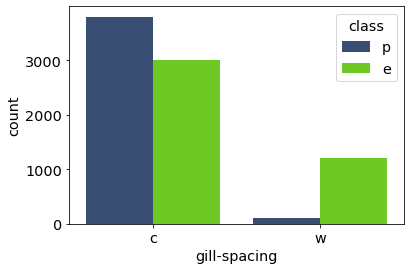

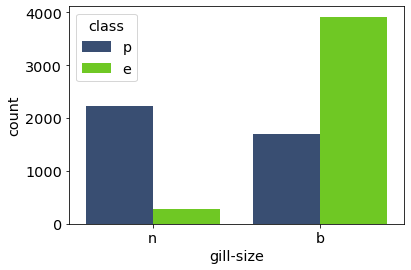

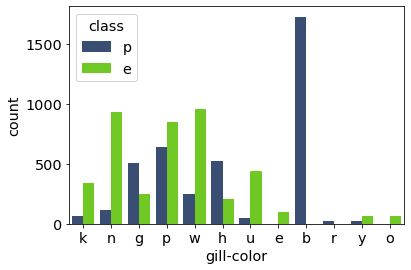

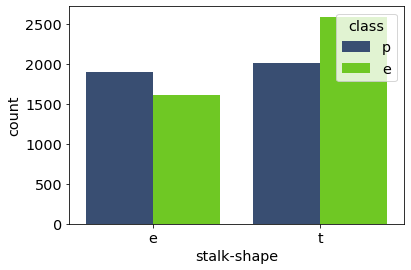

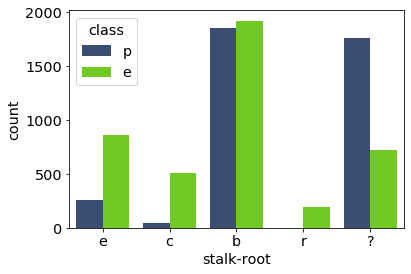

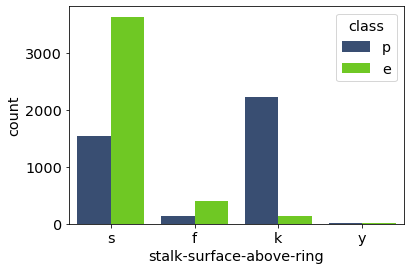

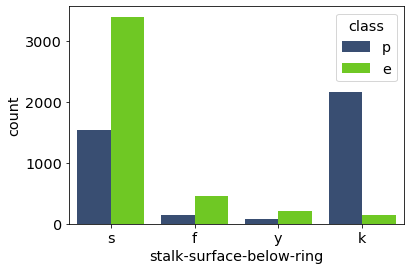

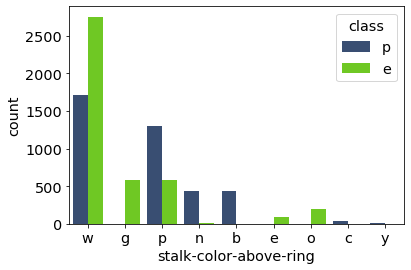

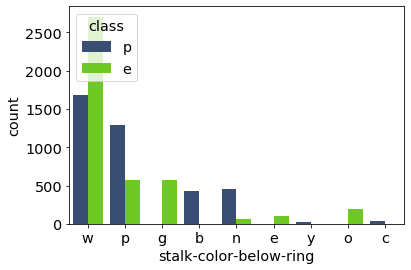

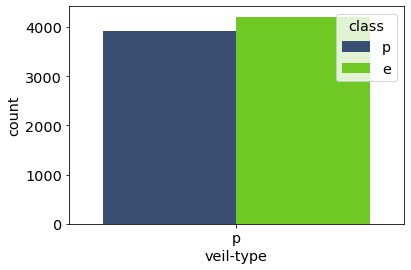

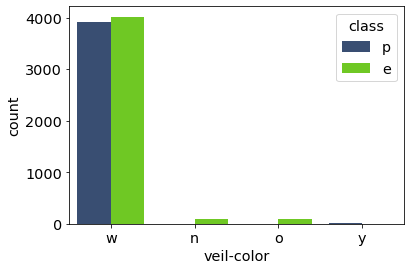

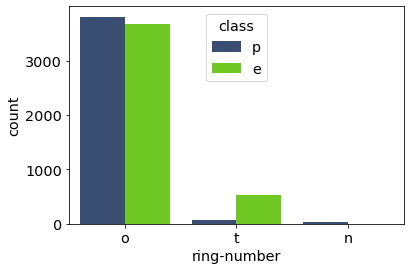

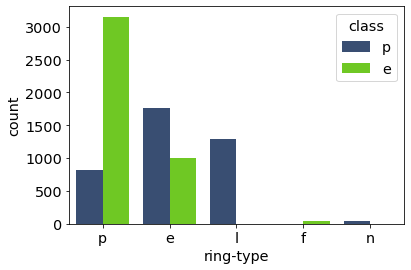

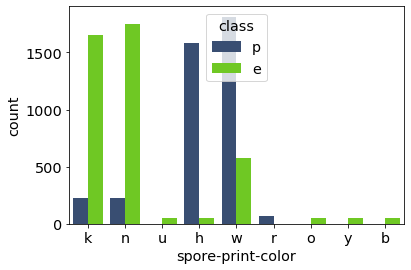

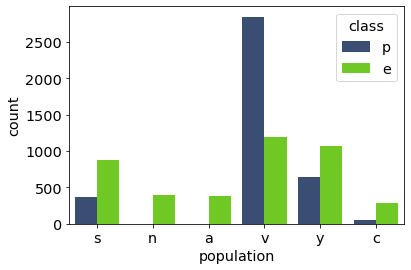

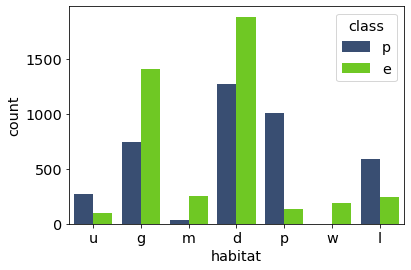

In [112]:
for i in df.columns:
    sns.countplot(x=i, hue="class", data=df, palette =['#2f4b7c','#6de309'])
    plt.show()

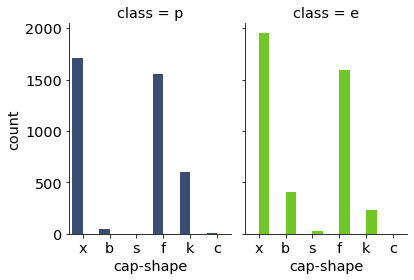

In [113]:
sns.catplot(x="cap-shape", hue="class", col="class",
                data=df, kind="count",
                height=4, aspect=.7,palette =['#2f4b7c','#6de309']);

In [258]:
df['class']=df['class'].map({'p':0,'e':1})

In [259]:
y = df['class']
x = df.drop('class', axis=1)

In [260]:
# One hot encoding independent variable x_1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

x = pd.get_dummies(x, prefix_sep='_')
x = StandardScaler().fit_transform(x)

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [262]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [263]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,QuantileTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [264]:
Confusion_Matrices=[]
Classifiers=[]
Scores=[]
Best_Parameters=[]
Cross_Val_Test_Scores=[]
random_state=42

# 2. 모델 적합하기

In [265]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


dt_param_grid = {"min_samples_split" : range(20,400,20),
                "max_depth": range(2,18,2)}


clf=GridSearchCV(DecisionTreeClassifier(random_state = random_state),param_grid=dt_param_grid,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")
clf.fit(x_train,y_train)
Scores.append(clf.best_score_)
Confusion_Matrices.append(confusion_matrix(y_test, clf.predict(x_test)))
Classifiers.append("Decision Tree")
Cross_Val_Test_Scores.append(cross_val_score(clf, x_test, y_test,scoring="accuracy", cv=5).mean())
Best_Parameters.append(clf.best_estimator_)

print(accuracy_score(clf.predict(x_test), y_test))

0.9716923076923077


In [266]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [278]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest Classification on the Training set
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 100)
rf_clf.fit(x_train, y_train)                        
                            
# Predicting the test set
y_pred = classifier.predict(x_test)

print(accuracy_score(y_pred, y_test))

0.9747692307692307


In [268]:
# SVM classifier
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,1000]}



svc_clf=GridSearchCV(SVC(random_state = random_state),param_grid=svc_param_grid,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")
svc_clf.fit(x_train,y_train)
Scores.append(svc_clf.best_score_)
Confusion_Matrices.append(confusion_matrix(y_test, svc_clf.predict(x_test)))
Classifiers.append("SVC")
Cross_Val_Test_Scores.append(cross_val_score(svc_clf, x_test, y_test,scoring="accuracy", cv=5).mean())
Best_Parameters.append(svc_clf.best_estimator_)
y_pred = svc_clf.predict(x_test)

print(accuracy_score(y_pred, y_test))

0.9778461538461538


In [269]:
# Logistic Regression classifier
logreg_param_grid = {"C":np.logspace(-3,3,7)}
log_clf=GridSearchCV(LogisticRegression(random_state = random_state),param_grid=logreg_param_grid,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")
log_clf.fit(x_train,y_train)
Scores.append(log_clf.best_score_)
Confusion_Matrices.append(confusion_matrix(y_test, log_clf.predict(x_test)))
Classifiers.append("Logistic Regression")
Cross_Val_Test_Scores.append(cross_val_score(log_clf, x_test, y_test,scoring="accuracy", cv=5).mean())
Best_Parameters.append(log_clf.best_estimator_)

y_pred = log_clf.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.8787692307692307


In [270]:
# KNN Classifier
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

clf=GridSearchCV(KNeighborsClassifier(),param_grid=knn_param_grid,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")
clf.fit(x_train,y_train)
Scores.append(clf.best_score_)
Confusion_Matrices.append(confusion_matrix(y_test, clf.predict(x_test)))
Classifiers.append("KNN")
Cross_Val_Test_Scores.append(cross_val_score(clf, x_test, y_test,scoring="accuracy", cv=5).mean())
Best_Parameters.append(clf.best_estimator_)

print(accuracy_score(clf.predict(x_test), y_test))

0.9852307692307692


In [271]:
# XGboost Classifier
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(accuracy_score(clf.predict(x_test), y_test))

0.9852307692307692


In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [273]:
# CNN Classifier
model=Sequential()

model.add(Dense(22,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [274]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=12)

In [275]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=15,batch_size=256)

Epoch 1/15
26/26 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5510 - val_loss: 0.4949 - val_accuracy: 0.8640
Epoch 2/15
26/26 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.8115 - val_loss: 0.3618 - val_accuracy: 0.8714
Epoch 3/15
26/26 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8498 - val_loss: 0.3153 - val_accuracy: 0.8763
Epoch 4/15
26/26 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8647 - val_loss: 0.2998 - val_accuracy: 0.8769
Epoch 5/15
26/26 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8704 - val_loss: 0.2908 - val_accuracy: 0.8769
Epoch 6/15
26/26 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8751 - val_loss: 0.2850 - val_accuracy: 0.8775
Epoch 7/15
26/26 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8780 - val_loss: 0.2805 - val_accuracy: 0.8775
Epoch 8/15
26/26 [==

In [276]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

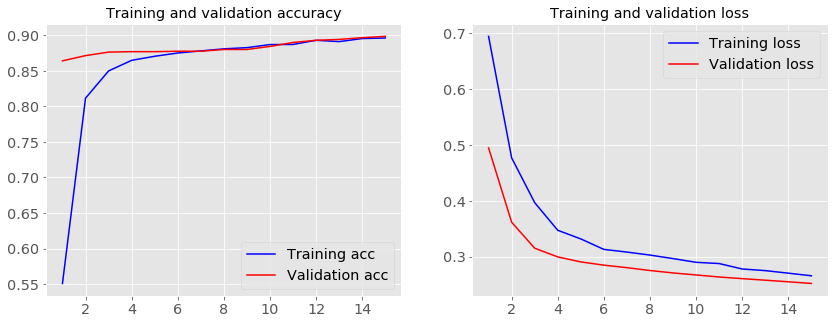

In [277]:
plot_history(history)